# Traffic Flow Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.font_manager as fm

In [2]:
# Define font properties
bold_font = fm.FontProperties(weight='bold', size=12)

In [3]:
# Generate Synthetic Data
np.random.seed(0)
n_samples = 1000
time_of_day = np.random.uniform(0,24,n_samples)
day_of_week = np.random.randint(0,3,n_samples) # Day of week. Monday = 0, Sunday = 6
weather_condition = np.random.randint(0,3,n_samples) # 0 = Sunny, 1 = Cloudy, 2 = Rainy
traffic_volume = 1000 + 50 * time_of_day + 100 * day_of_week + np.random.normal(0,200,n_samples)

In [4]:
data = pd.DataFrame({
    "Time_of_Day": time_of_day,
    "Day_of_Week": day_of_week,
    "Weather_Conditions": weather_condition,
    "Traffic_Volume": traffic_volume
})

In [6]:
X = data[["Time_of_Day", "Day_of_Week", "Weather_Conditions"]]
y = data["Traffic_Volume"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  43446.61313247684
R2 Score:  0.7187158870598486


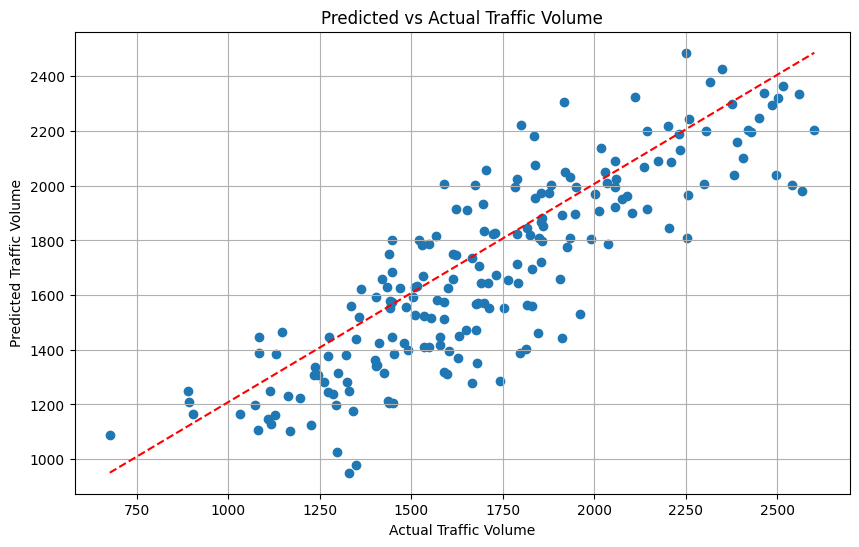

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], "--", color="red")
plt.title("Predicted vs Actual Traffic Volume")
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.xticks()
plt.yticks()
plt.grid(True)
plt.show()